# 5. K-means

In [3]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [6]:
X = dataset.iloc[:, :].values
# X = dataset.values
# X = dataset.to_numpy() 공식 홈페이지 권장 방식
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화(전체 데이터 분포 확인)

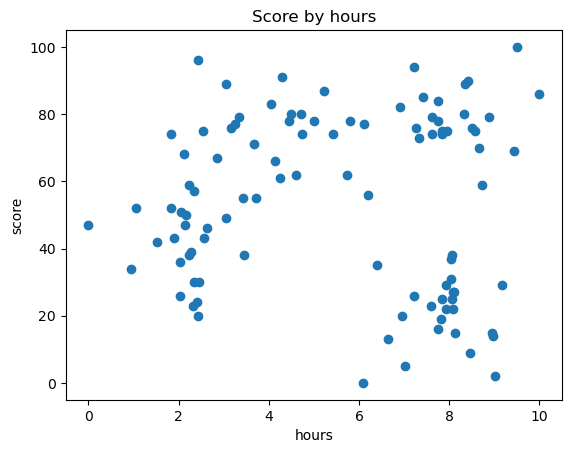

In [7]:
plt.scatter(X[:, 0], X[:, 1]) #X축은 공부시간, Y축은 점수
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (축 범위 통일)

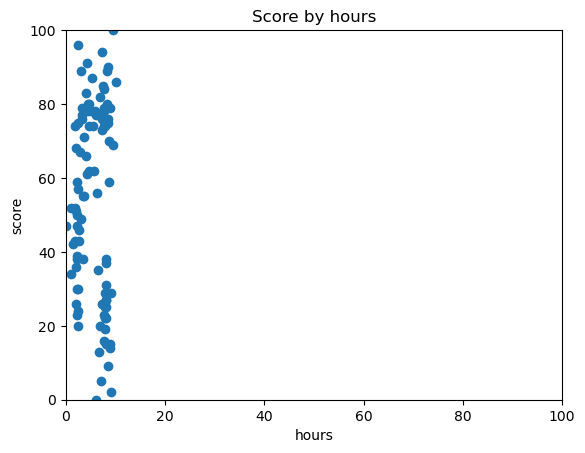

In [8]:
plt.scatter(X[:, 0], X[:, 1]) #X축은 공부시간, Y축은 점수
plt.title('Score by hours')
plt.xlabel('hours')
plt.xlim(0, 100)
plt.ylabel('score')
plt.ylim(0, 100)
plt.show()

### 피처 스케일링 (Feature Scaling)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화(스케일링 된 데이터)

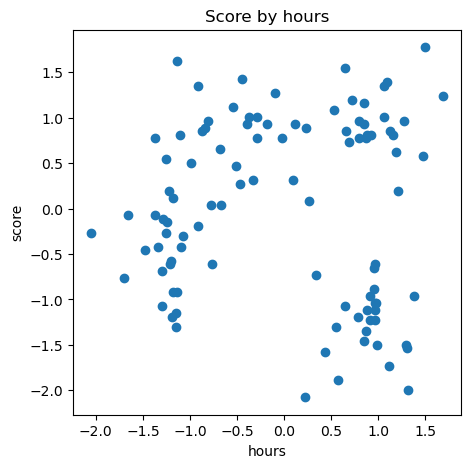

In [10]:
plt.figure(figsize = (5,5))
plt.scatter(X[:, 0], X[:, 1]) #X축은 공부시간, Y축은 점수
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 최적의 K 값 찾기(엘보우 방식 Elbow Method)

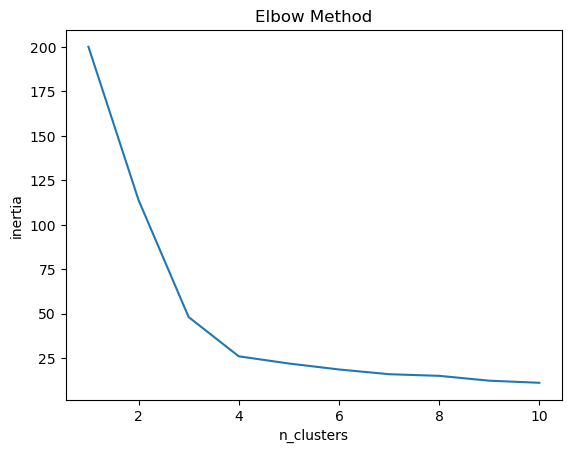

In [11]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, n_init = 10)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)  #각 지점으로부터 클러스터의 중심까지의 거리의 제곱의 합
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

### 최적의 K(4)값으로 KMeans 학습

In [12]:
K = 4 #최적의 k값

In [13]:
kmeans = KMeans(n_clusters = K, random_state = 0, n_init = 10)
#kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

In [14]:
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3], dtype=int32)

### 데이터 시각화(최적의 K)

In [15]:
centers = kmeans.cluster_centers_
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

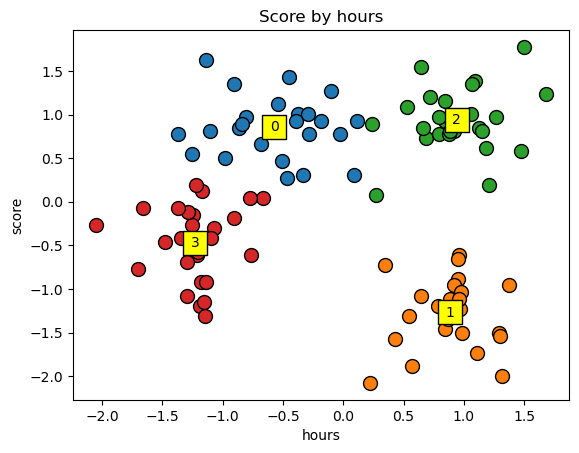

In [16]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s = 100, edgecolor = 'black')
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s = 300, edgecolor = 'black', color='yellow', marker='s')
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va = 'center', ha = 'center')
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화(스케일링 원복)

In [17]:
X_org = sc.inverse_transform(X)
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [18]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

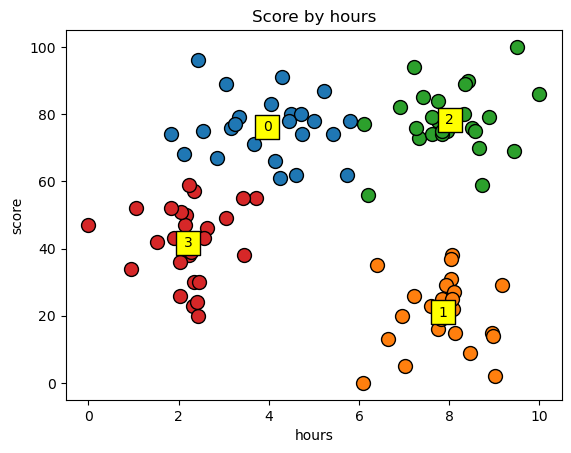

In [20]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s = 100, edgecolor = 'black')
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s = 300, edgecolor = 'black', color='yellow', marker='s')
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va = 'center', ha = 'center')
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

# 실습코드 (1)

In [26]:
dataset = pd.read_csv('Kmdf.csv')
dataset.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,3,182,4310.00
2,12348,76,31,1797.24
3,12349,19,73,1757.55
4,12350,311,17,334.40


In [27]:
X = dataset.iloc[:, 2:].values
# X = dataset.values
# X = dataset.to_numpy() 공식 홈페이지 권장 방식
X[:5]

array([[1.00000e+00, 7.71836e+04],
       [1.82000e+02, 4.31000e+03],
       [3.10000e+01, 1.79724e+03],
       [7.30000e+01, 1.75755e+03],
       [1.70000e+01, 3.34400e+02]])

### 데이터 시각화(전체 데이터 분포 확인)

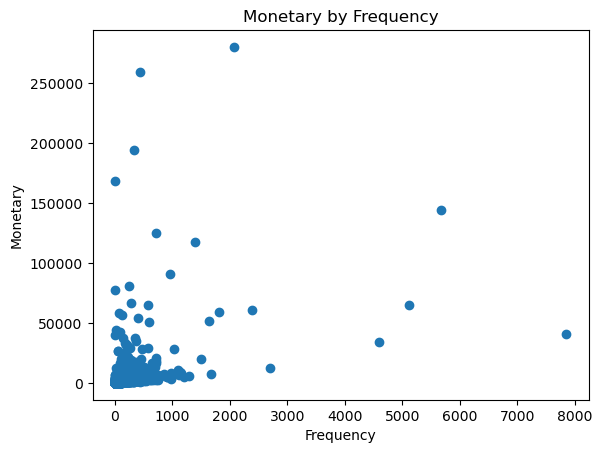

In [29]:
plt.scatter(X[:, 0], X[:, 1]) #X축은 Frequency, Y축은 Monetary
plt.title('Monetary by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

### 데이터 시각화 (축 범위 통일)

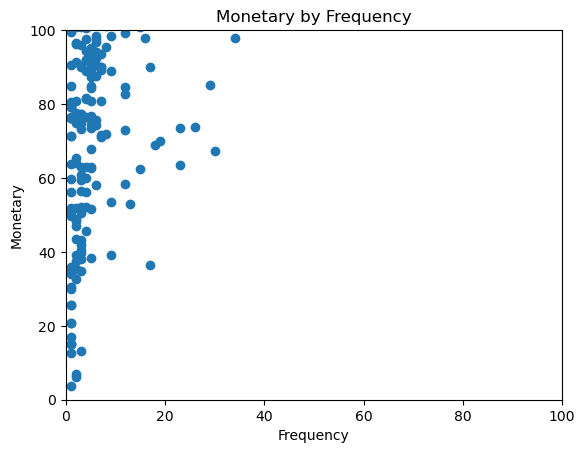

In [30]:
plt.scatter(X[:, 0], X[:, 1]) 
plt.title('Monetary by Frequency')
plt.xlabel('Frequency')
plt.xlim(0, 100)
plt.ylabel('Monetary')
plt.ylim(0, 100)
plt.show()

### 피처 스케일링 (Feature Scaling)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[-0.3965777 ,  8.35866818],
       [ 0.39464896,  0.25096626],
       [-0.26543516, -0.02859601],
       [-0.08183561, -0.0330118 ],
       [-0.32663501, -0.19134727]])

### 데이터 시각화(스케일링 된 데이터)

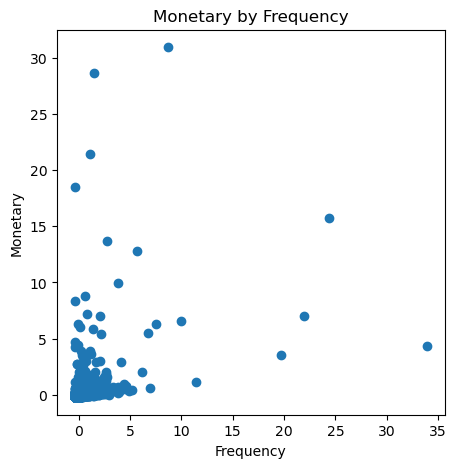

In [33]:
plt.figure(figsize = (5,5))
plt.scatter(X[:, 0], X[:, 1]) #X축은 공부시간, Y축은 점수
plt.title('Monetary by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

### 최적의 K 값 찾기(엘보우 방식 Elbow Method)

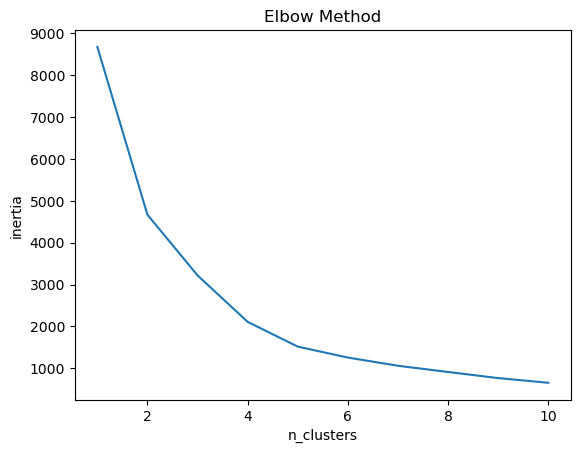

In [34]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, n_init = 10)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)  #각 지점으로부터 클러스터의 중심까지의 거리의 제곱의 합
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

### 최적의 K(4)값으로 KMeans 학습

In [35]:
K = 6 #최적의 k값

In [36]:
kmeans = KMeans(n_clusters = K, random_state = 0, n_init = 10)
#kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

In [37]:
y_kmeans

array([4, 5, 0, ..., 0, 3, 0], dtype=int32)

### 데이터 시각화(최적의 K)

In [38]:
centers = kmeans.cluster_centers_
centers

array([[-0.20709819, -0.13495785],
       [ 2.71040765, 24.88457404],
       [24.98387528,  7.66238678],
       [ 3.01101094,  0.70967009],
       [ 2.25315733,  6.72303348],
       [ 0.69407996,  0.31149992]])

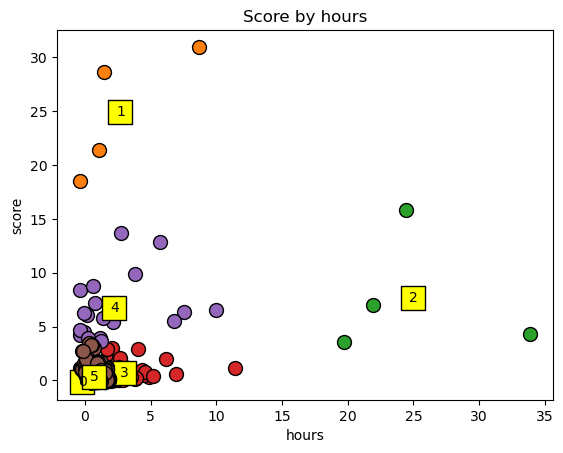

In [39]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s = 100, edgecolor = 'black')
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s = 300, edgecolor = 'black', color='yellow', marker='s')
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va = 'center', ha = 'center')
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화(스케일링 원복)

In [40]:
X_org = sc.inverse_transform(X)
X_org[:5]

array([[1.00000e+00, 7.71836e+04],
       [1.82000e+02, 4.31000e+03],
       [3.10000e+01, 1.79724e+03],
       [7.30000e+01, 1.75755e+03],
       [1.70000e+01, 3.34400e+02]])

In [41]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[4.43450916e+01, 8.41239104e+02],
       [7.11750000e+02, 2.25721652e+05],
       [5.80700000e+03, 7.09252875e+04],
       [7.80515625e+02, 8.43291906e+03],
       [6.07150000e+02, 6.24821975e+04],
       [2.50497453e+02, 4.85408823e+03]])

# 실습코드 (1)

In [26]:
dataset = pd.read_csv('Kmdf.csv')
dataset.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,3,182,4310.00
2,12348,76,31,1797.24
3,12349,19,73,1757.55
4,12350,311,17,334.40


In [44]:
X = dataset[['Recency','Monetary']].values
# X = dataset.values
# X = dataset.to_numpy() 공식 홈페이지 권장 방식
X[:5]

array([[3.26000e+02, 7.71836e+04],
       [3.00000e+00, 4.31000e+03],
       [7.60000e+01, 1.79724e+03],
       [1.90000e+01, 1.75755e+03],
       [3.11000e+02, 3.34400e+02]])

### 데이터 시각화(전체 데이터 분포 확인)

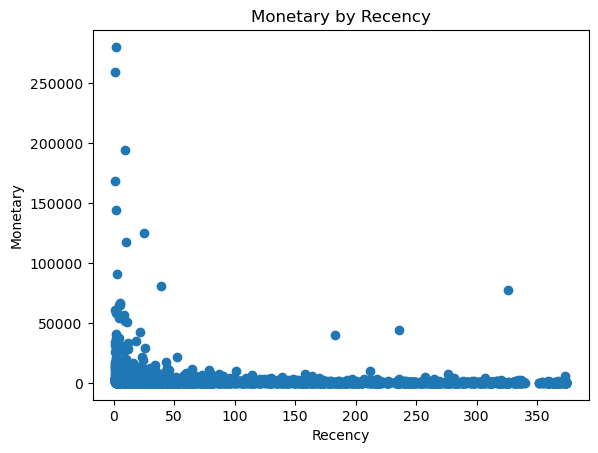

In [45]:
plt.scatter(X[:, 0], X[:, 1]) #X축은 Frequency, Y축은 Monetary
plt.title('Monetary by Recency')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

### 데이터 시각화 (축 범위 통일)

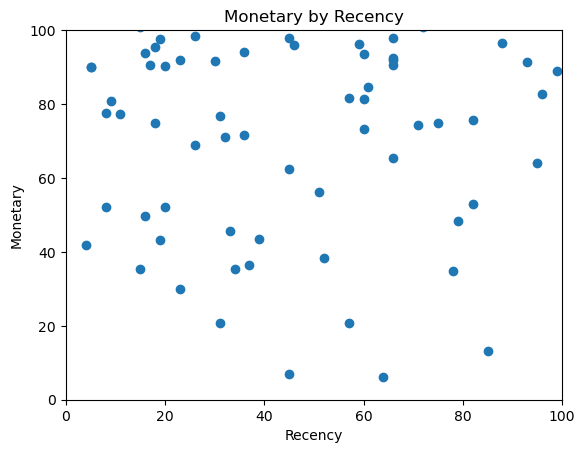

In [46]:
plt.scatter(X[:, 0], X[:, 1]) 
plt.title('Monetary by Recency')
plt.xlabel('Recency')
plt.xlim(0, 100)
plt.ylabel('Monetary')
plt.ylim(0, 100)
plt.show()

### 피처 스케일링 (Feature Scaling)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 2.32938811,  8.35866818],
       [-0.90058811,  0.25096626],
       [-0.17059349, -0.02859601],
       [-0.74058929, -0.0330118 ],
       [ 2.17938921, -0.19134727]])

### 데이터 시각화(스케일링 된 데이터)

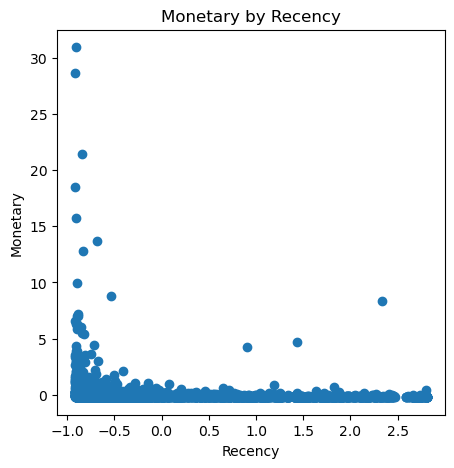

In [48]:
plt.figure(figsize = (5,5))
plt.scatter(X[:, 0], X[:, 1]) #X축은 공부시간, Y축은 점수
plt.title('Monetary by Recency')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

### 최적의 K 값 찾기(엘보우 방식 Elbow Method)

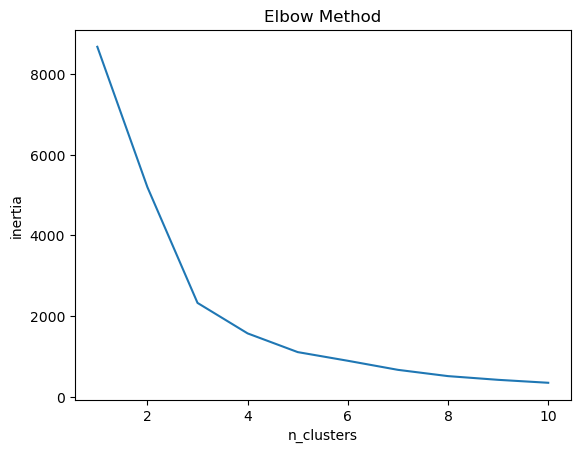

In [49]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, n_init = 10)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)  #각 지점으로부터 클러스터의 중심까지의 거리의 제곱의 합
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

### 최적의 K(5)값으로 KMeans 학습

In [50]:
K = 5 #최적의 k값

In [51]:
kmeans = KMeans(n_clusters = K, random_state = 0, n_init = 10)
#kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

In [52]:
y_kmeans

array([3, 0, 0, ..., 0, 0, 0], dtype=int32)

### 데이터 시각화(최적의 K)

In [53]:
centers = kmeans.cluster_centers_
centers

array([[-6.04130800e-01, -1.42403106e-02],
       [ 2.01927821e+00, -1.82482213e-01],
       [-9.00588115e-01,  2.30622594e+01],
       [-5.68667481e-01,  6.13408351e+00],
       [ 5.97667035e-01, -1.46696359e-01]])

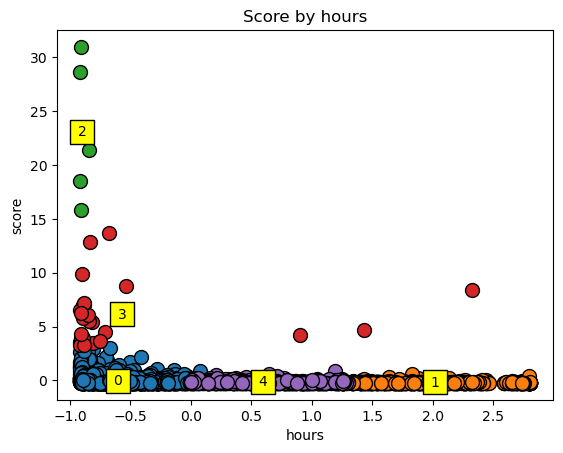

In [54]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s = 100, edgecolor = 'black')
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s = 300, edgecolor = 'black', color='yellow', marker='s')
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va = 'center', ha = 'center')
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화(스케일링 원복)

In [55]:
X_org = sc.inverse_transform(X)
X_org[:5]

array([[3.26000e+02, 7.71836e+04],
       [3.00000e+00, 4.31000e+03],
       [7.60000e+01, 1.79724e+03],
       [1.90000e+01, 1.75755e+03],
       [3.11000e+02, 3.34400e+02]])

In [56]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[3.26459497e+01, 1.92627178e+03],
       [2.94988782e+02, 4.14080881e+02],
       [3.00000000e+00, 2.09342334e+05],
       [3.61923077e+01, 5.71886008e+04],
       [1.52826618e+02, 7.35731088e+02]])

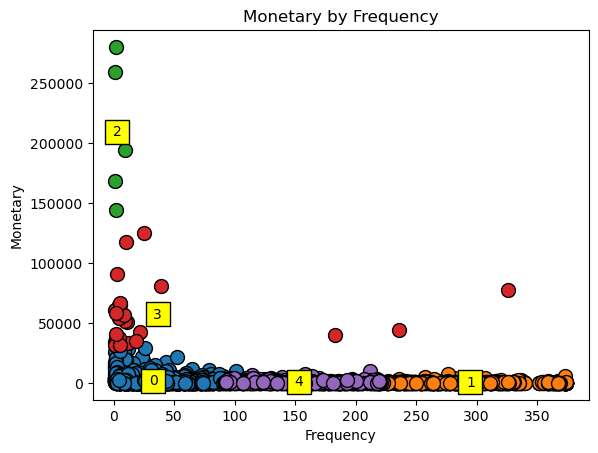

In [57]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s = 100, edgecolor = 'black')
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s = 300, edgecolor = 'black', color='yellow', marker='s')
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va = 'center', ha = 'center')

plt.title('Monetary by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

# 실습코드 (2)

In [27]:
X = dataset.iloc[:, 2:].values
# X = dataset.values
# X = dataset.to_numpy() 공식 홈페이지 권장 방식
X[:5]

array([[1.00000e+00, 7.71836e+04],
       [1.82000e+02, 4.31000e+03],
       [3.10000e+01, 1.79724e+03],
       [7.30000e+01, 1.75755e+03],
       [1.70000e+01, 3.34400e+02]])

### 데이터 시각화(전체 데이터 분포 확인)

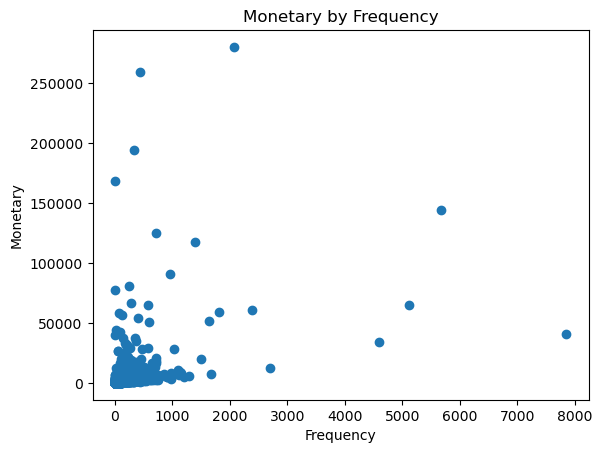

In [29]:
plt.scatter(X[:, 0], X[:, 1]) #X축은 Frequency, Y축은 Monetary
plt.title('Monetary by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

### 데이터 시각화 (축 범위 통일)

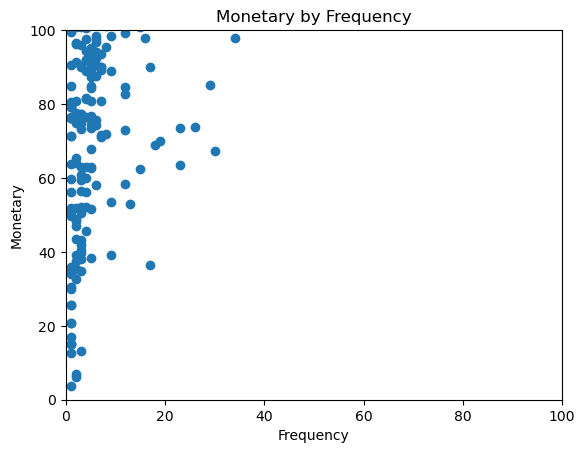

In [30]:
plt.scatter(X[:, 0], X[:, 1]) 
plt.title('Monetary by Frequency')
plt.xlabel('Frequency')
plt.xlim(0, 100)
plt.ylabel('Monetary')
plt.ylim(0, 100)
plt.show()

### 피처 스케일링 (Feature Scaling)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[-0.3965777 ,  8.35866818],
       [ 0.39464896,  0.25096626],
       [-0.26543516, -0.02859601],
       [-0.08183561, -0.0330118 ],
       [-0.32663501, -0.19134727]])

### 데이터 시각화(스케일링 된 데이터)

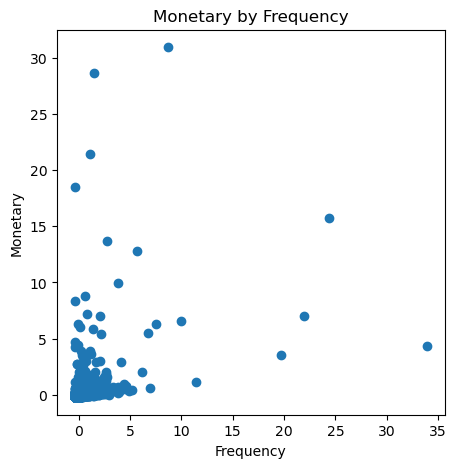

In [33]:
plt.figure(figsize = (5,5))
plt.scatter(X[:, 0], X[:, 1]) #X축은 공부시간, Y축은 점수
plt.title('Monetary by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

### 최적의 K 값 찾기(엘보우 방식 Elbow Method)

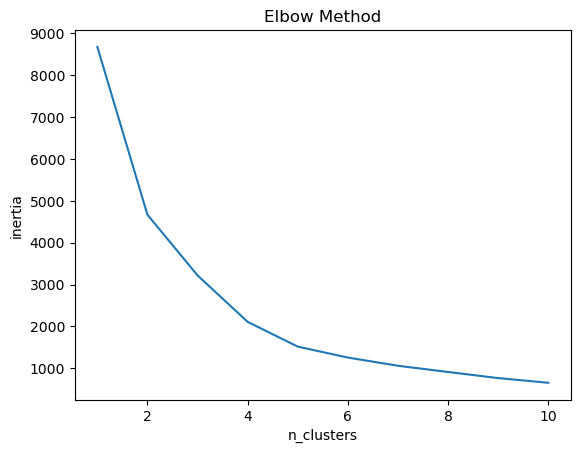

In [34]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, n_init = 10)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)  #각 지점으로부터 클러스터의 중심까지의 거리의 제곱의 합
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

### 최적의 K(6)값으로 KMeans 학습

In [35]:
K = 6 #최적의 k값

In [36]:
kmeans = KMeans(n_clusters = K, random_state = 0, n_init = 10)
#kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

In [37]:
y_kmeans

array([4, 5, 0, ..., 0, 3, 0], dtype=int32)

### 데이터 시각화(최적의 K)

In [38]:
centers = kmeans.cluster_centers_
centers

array([[-0.20709819, -0.13495785],
       [ 2.71040765, 24.88457404],
       [24.98387528,  7.66238678],
       [ 3.01101094,  0.70967009],
       [ 2.25315733,  6.72303348],
       [ 0.69407996,  0.31149992]])

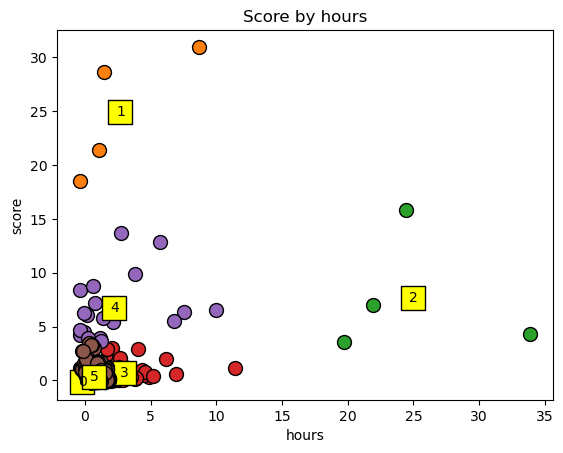

In [39]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s = 100, edgecolor = 'black')
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s = 300, edgecolor = 'black', color='yellow', marker='s')
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va = 'center', ha = 'center')
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화(스케일링 원복)

In [40]:
X_org = sc.inverse_transform(X)
X_org[:5]

array([[1.00000e+00, 7.71836e+04],
       [1.82000e+02, 4.31000e+03],
       [3.10000e+01, 1.79724e+03],
       [7.30000e+01, 1.75755e+03],
       [1.70000e+01, 3.34400e+02]])

In [41]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[4.43450916e+01, 8.41239104e+02],
       [7.11750000e+02, 2.25721652e+05],
       [5.80700000e+03, 7.09252875e+04],
       [7.80515625e+02, 8.43291906e+03],
       [6.07150000e+02, 6.24821975e+04],
       [2.50497453e+02, 4.85408823e+03]])

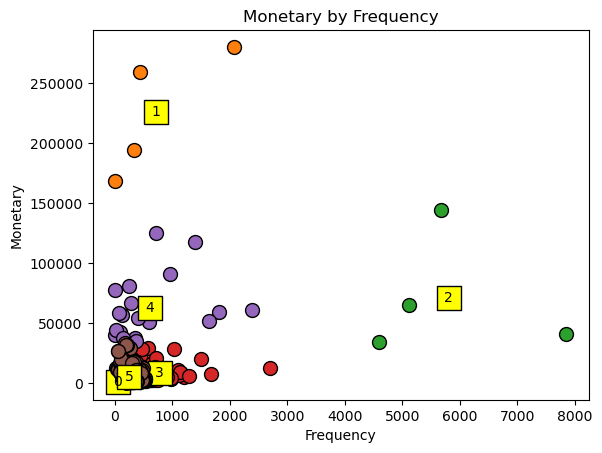

In [43]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s = 100, edgecolor = 'black')
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s = 300, edgecolor = 'black', color='yellow', marker='s')
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va = 'center', ha = 'center')

plt.title('Monetary by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

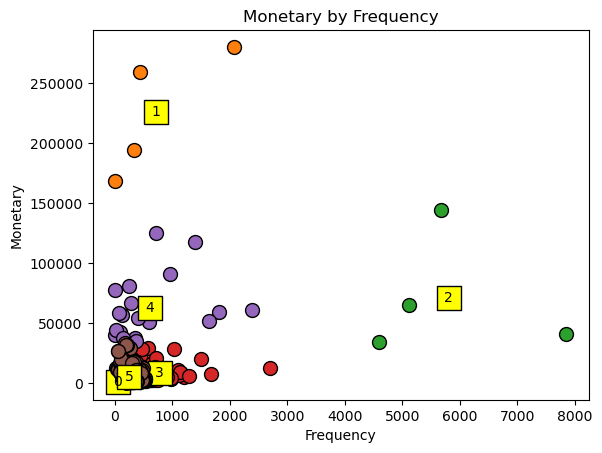

In [43]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s = 100, edgecolor = 'black')
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s = 300, edgecolor = 'black', color='yellow', marker='s')
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va = 'center', ha = 'center')

plt.title('Monetary by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

# 6. Quiz
### 어느 결혼식장에서 피로연의 식수 인원을 올바르게 예측하지 못하여 버려지는 음식으로 고민이 많다고 합니다. 현재까지 진행된 결혼식에 대한 결혼식 참석 인원과 그 중에서 식사를 하는 인원의 데이터가 제공될 때, 아래 각 문항에 대한 코드를 작성하시오.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1) QuizData.csv 파일로부터 데이터를 읽어와서 결혼식 참석 인원(total), 식수 인원(reception)을 각각의 변수로 저장

In [4]:
dataset = pd.read_csv('QuizData.csv')
dataset[:5]

,total,reception
0,118,62
1,253,148
2,320,201
3,94,80
4,155,92


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
X[:5], y[:5]

(array([[118],
        [253],
        [320],
        [ 94],
        [155]], dtype=int64),
 array([ 62, 148, 201,  80,  92], dtype=int64))

### 2) 전체 데이터를 훈련 세트와 테스트 세트로 분리하기 - 비율 75:25
(단, random_state = 0으로 설정)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### 3) 훈련 세트를 이용하여 단순 선형 회귀 (Simple Linear Regression) 모델 생성하기

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### 4) 데이터 시각화 (훈련 세트) 코드 작성하기

In [11]:
y_pred = reg.predict(X_train)
y_pred

array([157.62040465, 126.62674204,  81.4064802 , 103.25447187,
       187.08978877, 120.02153525,  90.0440583 , 117.48107111,
       196.23545971, 170.83081822, 223.67247251,  72.26080926,
        84.45503717, 137.80478429,  68.19606662])

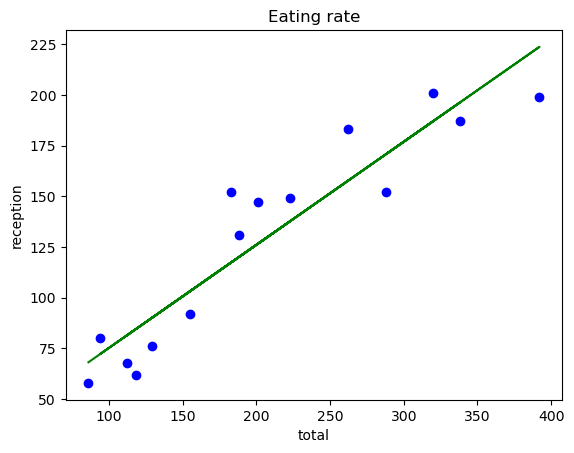

In [13]:
plt.scatter(X_train, y_train, color = 'blue') #산점도
plt.plot(X_train, y_pred, color = 'green') #선 그래프
plt.title('Eating rate') #제목
plt.xlabel('total') #X 축 이름
plt.ylabel('reception') #y 축 이름
plt.show()

### 5) 데이터 시각화(테스트 세트) 코드 작성하기

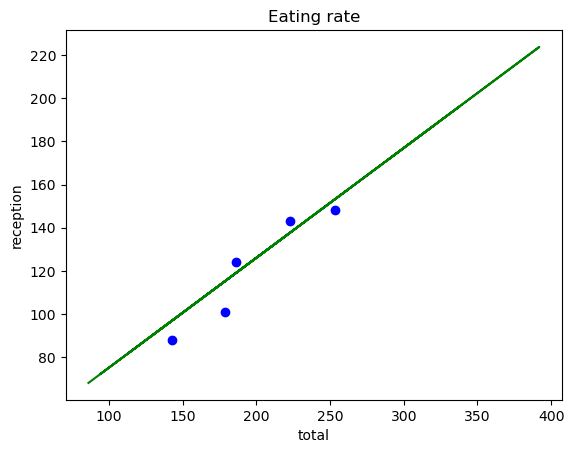

In [15]:
plt.scatter(X_test, y_test, color = 'blue') #산점도
plt.plot(X_train, y_pred, color = 'green') #선 그래프
plt.title('Eating rate') #제목
plt.xlabel('total') #X 축 이름
plt.ylabel('reception') #y 축 이름
plt.show()

### 6) 훈련 세트, 테스트 세트에 대한 모델 평가 점수

In [16]:
reg.score(X_train, y_train)

0.8707088403321211

In [17]:
reg.score(X_test, y_test)

0.8634953212566615

### 7) total = 300 일 때 예상되는 reception

In [19]:
total = 300
reg.predict([[total]])

array([176.92793218])

> 176.92 반올림해서 177명으로 예상 가능